[array([0]), array([0]), array([1226]), array([2718]), array([3870])]
[[   0]
 [   0]
 [1226]
 [2718]
 [3870]]
[0 1 2 3 4]


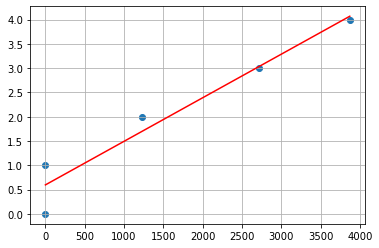

In [58]:
from tkinter import *
import serial
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt #!pip install matplot
from sklearn import linear_model  #!pip install scikit-learn
from sklearn.metrics import mean_squared_error, r2_score

esp32 = serial.Serial('COM4',115200)
DELAY = 500
dato = []

def muestra():
    while(len(dato)<5):
        text1.delete(0,'end')
        dato.append(esp32.readline().decode())
        text1.insert(0,esp32.readline().decode())
        text1.after(DELAY, muestra)
    
def guarda():
    for i in range(len(dato)):
        dato[i] = dato[i].strip()
        dato[i] =int(dato[i])
        dato[i]=np.array([dato[i]])
    print(dato)

def regresion():
    xdata=np.array(dato)
    ydata=np.arange(len(dato))
    print(xdata)
    print(ydata)
    modelo = linear_model.LinearRegression()
    modelo.fit(xdata,ydata) #ejecución del modelo de regresión
    #inspección visual de la información.
    plt.scatter(xdata,ydata) #gráfico de puntos
    plt.plot(xdata,modelo.predict(xdata), color = 'red')
    plt.grid()
    plt.show()

    
ventana = Tk()
ventana.title('Prueba_actualiza_automatico')
ventana.geometry('300x300')

text1 = Entry(ventana, width=20)
text1.pack()

boton = Button(ventana, text='inicio', command=muestra)
boton.pack()

boton2 = Button(ventana, text='guarda_datos', command=guarda)
boton2.pack()

boton3 = Button(ventana, text='calcula_regresion', command=regresion)
boton3.pack()

ventana.mainloop()
esp32.close()

In [48]:
dato
xdata=np.array([dato])
print(xdata)

[[2304 2610 2167 1547 1856]]


In [51]:
for i in range(len(dato)):
    dato[i] = dato[i].strip()
    dato[i] =int(dato[i])
    dato[i]=np.array([dato[i]])
print(dato)

AttributeError: 'int' object has no attribute 'strip'

In [23]:
for i in range(len(dato)):
    dato[i] = dato[i].strip()
print (dato)

['0', '0', '1309', '2833', '4095', '2075', '2076']


In [41]:
for i in range(len(dato)):
        dato[i] = dato[i].strip()
        dato[i] =int(dato[i])
print (dato)

[2576, 2577, 2578, 2576, 2578]


In [9]:
#librerias
import serial
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

#variable de almacenamiento de datos de entrada
dato = [] #lista vacía

#función para convertir los datos a valores numericos y procesarlos (como arreglos)
def guarda():
    for i in range(len(dato)):
        dato[i] = dato[i].strip() #eliminar los saltos de linea
        dato[i] =int(dato[i]) #convertir el string a entero
        #dato[i]=np.array([dato[i]]) #convertir la lista a arreglo
    return dato

#configuración del puerto
micro = serial.Serial('COM4',115200)

#lectura de 5 datos
while(len(dato)<5):   #se hará una lectura de 5 datos
    dato.append(micro.readline().decode()) #decode es la decodificación del ascii

#cambiar la lista a un arreglo para realizar el proceso de la información
dato = guarda() 
print(dato)

#cerrar el puerto serial
micro.close()

[2605, 2593, 1695, 780, 0]


In [4]:
micro.close()

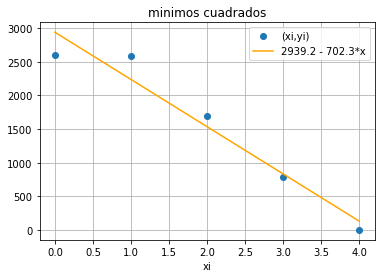

 f =  2939.2 - 702.3*x
coef_corr   r  =  -0.9724094360195479
coef_det r2 =  0.9455801112598552
94.56% de los datos


In [16]:
# mínimos cuadrados, regresión con polinomio grado 1

#[2605, 2593, 1695, 780, 0]

#librerías
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt

# datos de entrada

xdata=np.arange(len(dato),dtype=float) #valores obtenidos desde el puerto serial
ydata=np.array(dato, dtype=float)
n= len(xdata)


# obtención de los valores de sumatorias y valores de las medias
xm  = np.mean(xdata)
ym  = np.mean(ydata)
sx  = np.sum(xdata)
sy  = np.sum(ydata)
sxy = np.sum(xdata*ydata)
sx2 = np.sum(xdata**2)
sy2 = np.sum(ydata**2)

# cálculo de los coeficientes a0 y a1
a1 = (n*sxy-sx*sy)/(n*sx2-sx**2)
a0 = ym - a1*xm

# creación del polinomio de grado 1
x = sym.Symbol('x')
f = a0 + a1*x

#transforma funciones simbólicas a funciones lambda para cáclulo rápido de valores numéricos
fx = sym.lambdify(x,f) 
fi = fx(xdata)

# coeficiente de correlación
num = n*sxy - sx*sy #numerador 
raiz1 = np.sqrt(n*sx2-sx**2)
raiz2 = np.sqrt(n*sy2-sy**2)
r = num/(raiz1*raiz2)

# coeficiente de determinacion
r2 = r**2
r2_porcentaje = np.around(r2*100,2)

# graficación de los datos
plt.plot(xdata,ydata,'o',label='(xi,yi)')
plt.plot(xdata,fi, color='orange',  label=f)
plt.legend(loc='best')
plt.xlabel('xi')
plt.title('minimos cuadrados')
plt.grid(True)
plt.show()

# datos de ajuste y coeficientes de correlación y determinación
print(' f = ',f)
print('coef_corr   r  = ', r)
print('coef_det r2 = ', r2)
print(str(r2_porcentaje)+'% de los datos')

In [7]:
xdata

array([0., 1., 2., 3., 4.])

In [8]:
ydata

array([[4095.],
       [4095.],
       [4095.],
       [3792.],
       [2895.]])